# Part II - Ford GoBike Bike Share System

## by Mark Okaba

## Introduction
> Introduce the dataset
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [39]:
# Load in the dataset intoa dataframe
tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')

In [40]:
# Print column names
tripdata.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [41]:
# High level overview of the data shape and compostion
print(tripdata.shape)
print(tripdata.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [42]:
# Find number of null values in each column
print(tripdata.isnull().sum())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64


In [43]:
# Find all duplicate rows
print(tripdata.duplicated().sum())

0


In [44]:
# Get 10 random samples from the dataframe
tripdata.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
113067,330,2019-02-12 13:21:57.5510,2019-02-12 13:27:28.4370,214.0,Market St at Brockhurst St,37.823321,-122.275733,315.0,Market St at 45th St,37.834174,-122.272968,3054,Subscriber,1992.0,Other,No
41892,918,2019-02-22 17:56:09.3950,2019-02-22 18:11:28.1570,36.0,Folsom St at 3rd St,37.783830,-122.398870,121.0,Mission Playground,37.759210,-122.421339,4773,Subscriber,1991.0,Male,No
141453,1064,2019-02-07 17:48:58.5660,2019-02-07 18:06:43.3490,19.0,Post St at Kearny St,37.788975,-122.403452,112.0,Harrison St at 17th St,37.763847,-122.413004,4947,Subscriber,1993.0,Male,No
95437,285,2019-02-15 13:50:16.5840,2019-02-15 13:55:02.1830,112.0,Harrison St at 17th St,37.763847,-122.413004,122.0,19th St at Mission St,37.760299,-122.418892,5547,Customer,NaN,NaN,No
3624,434,2019-02-28 17:05:57.8530,2019-02-28 17:13:12.8170,58.0,Market St at 10th St,37.776619,-122.417385,95.0,Sanchez St at 15th St,37.766219,-122.431060,6491,Subscriber,1991.0,Male,No


In [45]:
# Make a copy of the df
clean_trip = tripdata.copy()

In [46]:
#deleting the null values
clean_df = clean_trip.dropna()

In [47]:
# Drop irrelevant columns
columns = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']
for col in clean_df.columns:
    if col in columns:
        del clean_df[col]

In [48]:
# Confirm Dropped columns
clean_df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
90420,660,2019-02-16 12:36:49.1230,2019-02-16 12:47:49.8340,58.0,Market St at 10th St,66.0,3rd St at Townsend St,4956,Subscriber,1998.0,Male,No
71262,607,2019-02-19 17:35:23.9470,2019-02-19 17:45:31.7590,77.0,11th St at Natoma St,55.0,Webster St at Grove St,3624,Subscriber,1969.0,Female,No


In [49]:
# Confirm dropped columns
clean_df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
39503,303,2019-02-23 08:50:05.4090,2019-02-23 08:55:08.7760,266.0,Parker St at Fulton St,243.0,Bancroft Way at College Ave,5192,Subscriber,1986.0,Male,No
4620,163,2019-02-28 15:30:57.0500,2019-02-28 15:33:40.7830,280.0,San Fernando St at 7th St,341.0,Fountain Alley at S 2nd St,5732,Subscriber,1995.0,Male,Yes


In [50]:
# Convert wrong data types to correct data types: start_time,end_time, user_type, birth_year, member_gender, bike_share_for_all_trip

# convert user_type, member_gender, bike_share_for_all_trip, start_station_id, end_station_id
conv_dict = {'user_type': 'category',
                    'member_gender': 'category',
                    'bike_share_for_all_trip': 'category',
                    'start_station_id': 'category',
                    'end_station_id': 'category',
                    'member_birth_year': 'int64'}

# Convert the wrong data type with the dictionary
clean_df = clean_df.astype(conv_dict)

# Convert the start_time and end_time to datetime
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['end_time'] = pd.to_datetime(clean_df['end_time'])



In [51]:
#calculating the age of the users
clean_df['age'] = 2022 - clean_df['member_birth_year']

In [52]:
# Confirm the data types
print(clean_df.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                 category
start_station_name                 object
end_station_id                   category
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
age                                 int64
dtype: object


In [53]:
# descriptive statistics for numeric variables
print(clean_df.describe())

        duration_sec        bike_id  member_birth_year            age
count  174952.000000  174952.000000      174952.000000  174952.000000
mean      704.002744    4482.587555        1984.803135      37.196865
std      1642.204905    1659.195937          10.118731      10.118731
min        61.000000      11.000000        1878.000000      21.000000
25%       323.000000    3799.000000        1980.000000      30.000000
50%       510.000000    4960.000000        1987.000000      35.000000
75%       789.000000    5505.000000        1992.000000      42.000000
max     84548.000000    6645.000000        2001.000000     144.000000


### What is the structure of your dataset?

> There are 183412 trips in the data with 16 features ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']. Most of the variables are numeric in nature with few non-numeric like member_gender, user_type etc

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in predicting 
* When are most trips taken in terms of time of day, day of the week, or month of the year?
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will look at the start_time, duration and also the user_type

## Univariate Exploration

Let's begin by looking at the main variables of interest

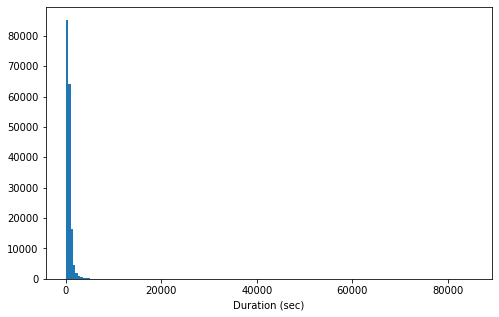

In [54]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, clean_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = clean_df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.show()

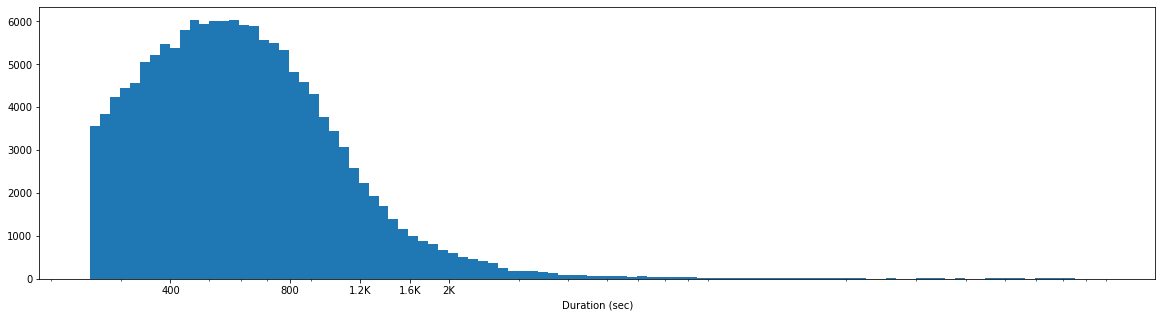

In [55]:
# The data distribution appears not to be a large spread. In order to get a better histogram showing the smaller part of the histogram we will do normalization.
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(clean_df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[20, 5])
plt.hist(data = clean_df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([400, 800, 1200, 1600, 2000], ['400', '800', '1.2K', '1.6K', '2K'])
plt.xlabel('Duration (sec)')
plt.show()

Duration has a thinner long tail distribution, with a lot trips occuring between the 400-800s mark when plotted on a log-scale. Interestingly, some of the trips took more than 2000s. The average trip, we can say took about 600s

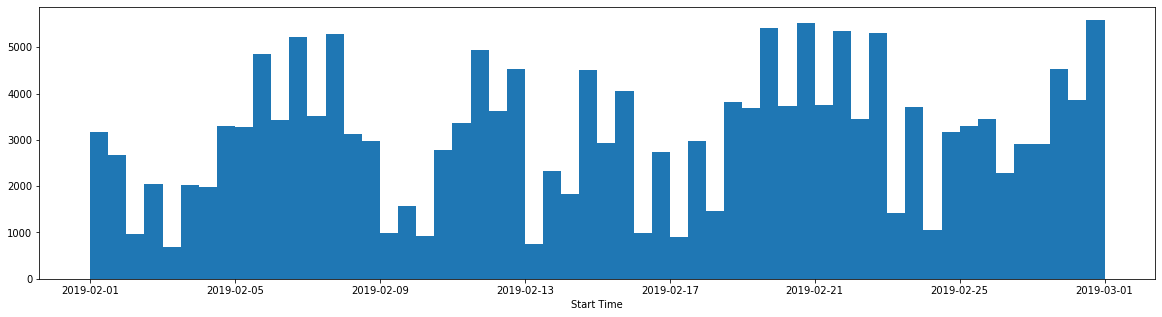

In [56]:
# What is the distribution of the start_time
plt.figure(figsize=[20, 5])
plt.hist(data = clean_df, x = 'start_time', bins = 'auto')
plt.xlabel('Start Time')
plt.show()

The entire trip span a single year, 2019

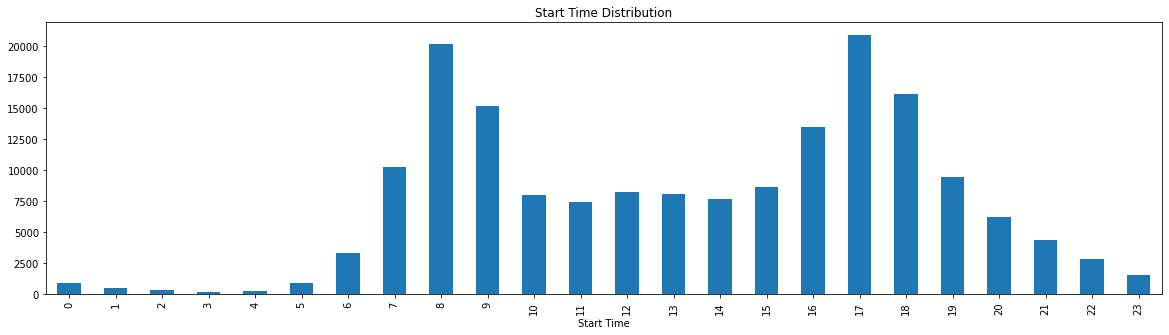

In [57]:
# What time of day is the most popular start time?
plt.figure(figsize=[20, 5])
clean_df['start_time'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Time')
plt.title('Start Time Distribution')
plt.show()

From the bar chart we can see that a lot of the trips took place after 6am. The highest trips were recorded at 8am and 5pm

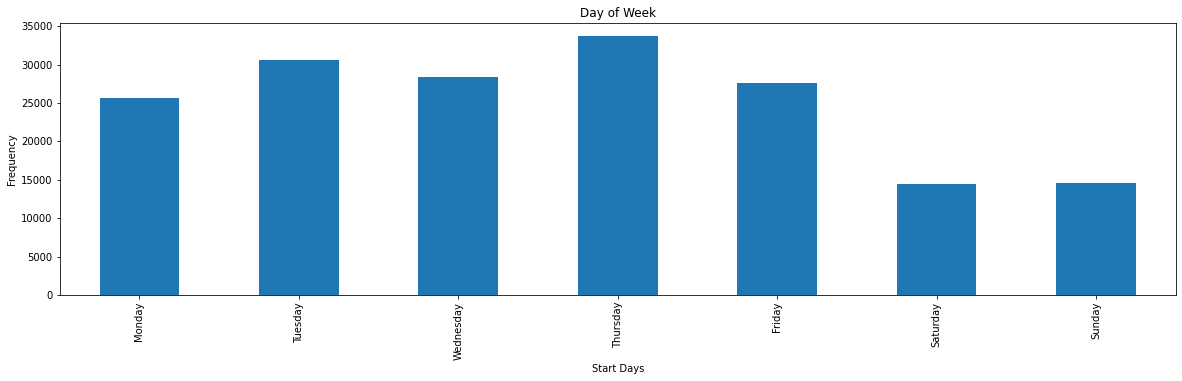

In [58]:
# What day of the week is the most popular start time?
plt.figure(figsize=[20, 5])
dayspplot = clean_df['start_time'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Days')
plt.ylabel('Frequency')
plt.title('Day of Week')
dayspplot.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

It is also evident that Thursday recorded the highest number of trips

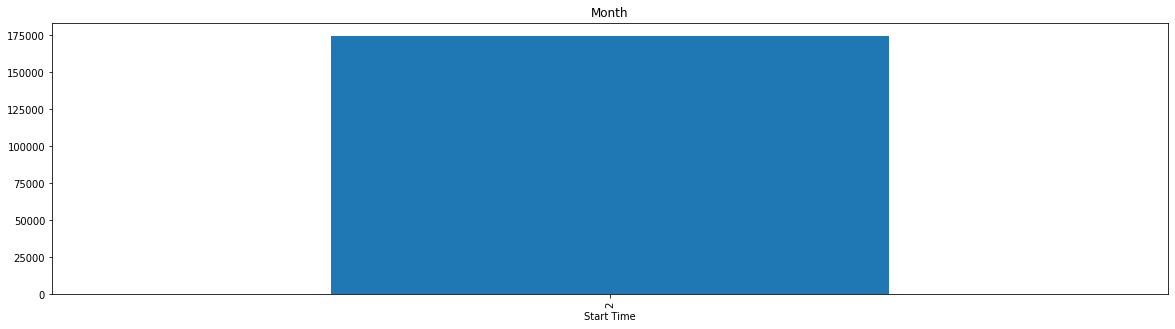

In [59]:
# What month is the most popular start time?
plt.figure(figsize=[20, 5])
clean_df['start_time'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Time')
plt.title('Month')
plt.show()

The dataset contains only record for February

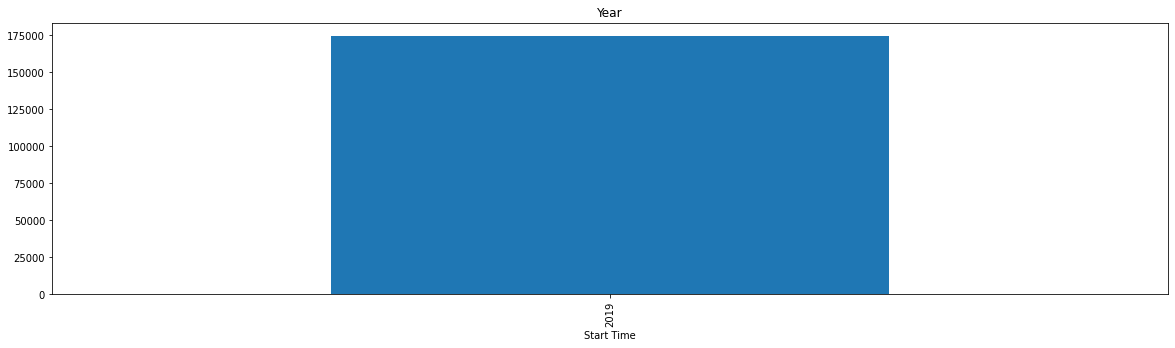

In [60]:
# What year is the most popular start time?
plt.figure(figsize=[20, 5])
clean_df['start_time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Start Time')
plt.title('Year')
plt.show()

The dataset contains only record for 2019

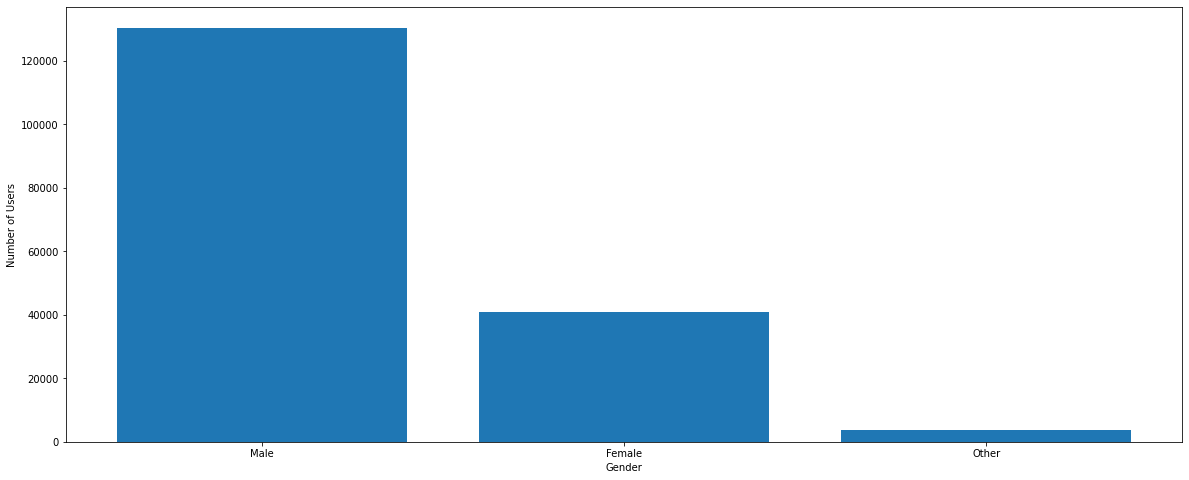

In [61]:
# plotting genders on bar.
plt.figure(figsize=[20,8])
plt.bar(x = clean_df.member_gender.value_counts().keys(), height = clean_df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

We can as well see that for users' sex, more males partook in trips than females and others

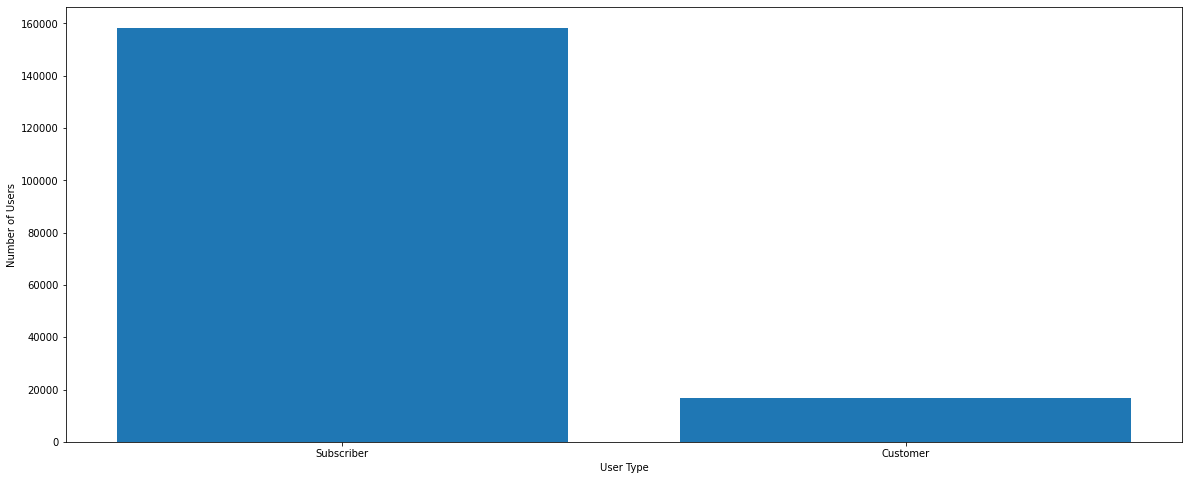

In [62]:
# plotting types of users on bar.
plt.figure(figsize=[20,8])
plt.bar(x = clean_df.user_type.value_counts().keys(), height = clean_df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

The dataset is a bit skewed as we find more number of subscribers than customers

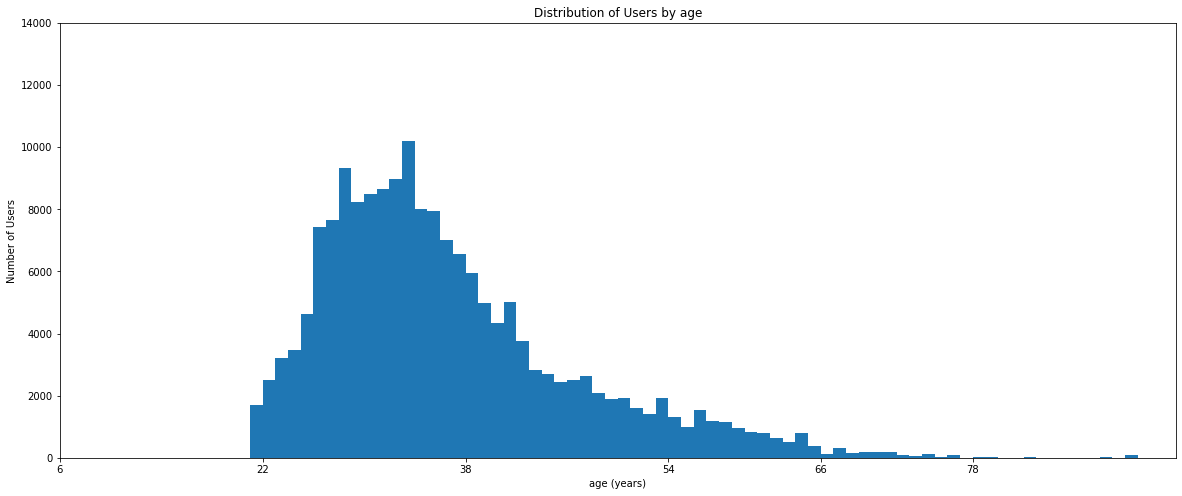

In [63]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, tripdata['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.hist(data = tripdata.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1928, 2016, 0, 14000])
plt.xticks([1944, 1956, 1968, 1984, 2000, 2016], [(2022-1944), (2022-1956), (2022-1968), (2022-1984), (2022-2000), (2022-2016)])
plt.gca().invert_xaxis()
plt.title('Distribution of Users by age')
plt.xlabel('age (years)')
plt.ylabel('Number of Users')
plt.show()

In terms of age distribution, we find a lot of the bikers fall between 25-40yrs with the average age being about 35.

<AxesSubplot:title={'center':'Top 10 Stations with the highest number of trips'}, ylabel='Start Station Name'>

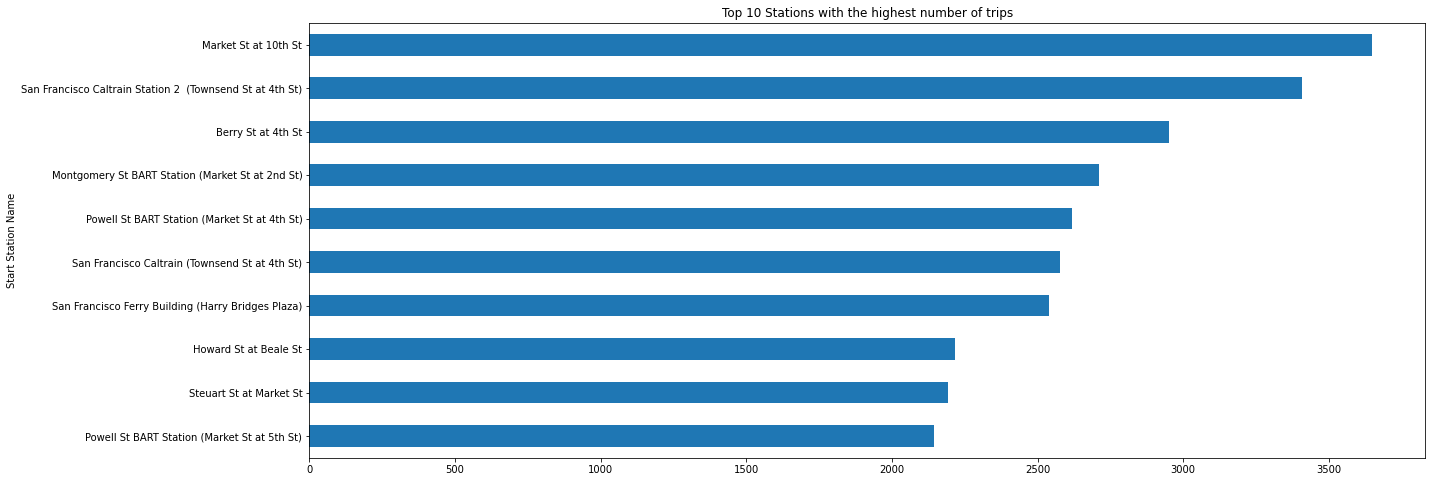

In [64]:
# Find the stations with the highest number of trips
top_10_start_station = clean_df.start_station_name.value_counts().iloc[:10][::-1]
plt.figure(figsize=(20,8))
top_10_start_station.plot(kind='barh', xlabel='Start Station Name', ylabel='Frequency', title='Top 10 Stations with the highest number of trips' )

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Summarily, from the univariate data exploration, we can confirm that
* Most of the trips took place around 7am to 10pm with the highest trips at 8am and 6pm
* It is evident that . This data is a 2019 data alone so all the trips were in a single year(2019) and a single month(February)
* Thursday recorded the highest number of trips in the week in the dataset
* The common ages of riders are from 25 to 40 years.
* There are more males riders that females riders.
* The number of subscribers were more bigger than the customers number.
* The most station the has users is Market St at 10th St

## Bivariate Exploration

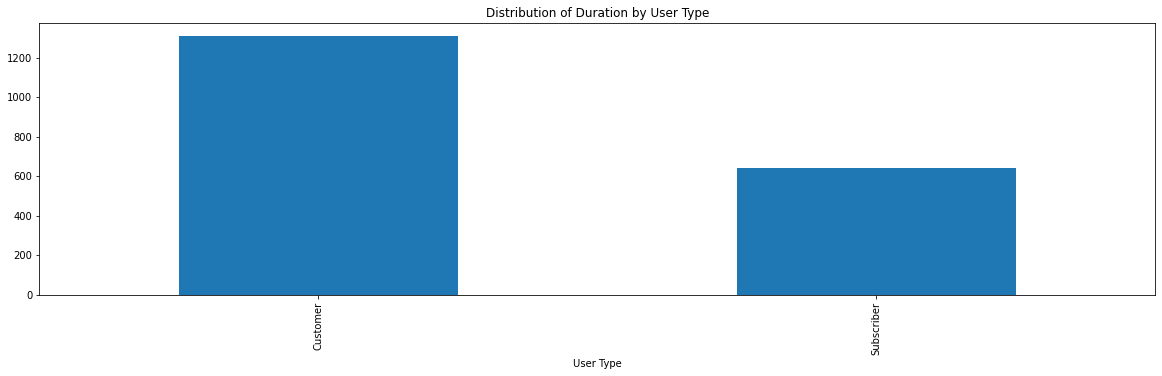

In [65]:
# Relationship between user_type and duration_sec
plt.figure(figsize=[20, 5])
clean_df.groupby('user_type')['duration_sec'].mean().plot(kind='bar')
plt.xlabel('User Type')
plt.title('Distribution of Duration by User Type')
plt.show()

The relation between duration of trips and user type is such that we have customers accumulating more minutes than subscribers

In [66]:
# Relationship between user_type and start_time
time_trips = clean_df.groupby(['user_type', pd.Grouper(key='start_time', freq='1W')])['user_type'].size().reset_index(name='count')
time_trips


,user_type,start_time,count
0,Customer,2019-02-03,1158
1,Customer,2019-02-10,3506
2,Customer,2019-02-17,3927
3,Customer,2019-02-24,5791
4,Customer,2019-03-03,2184
5,Subscriber,2019-02-03,10381
6,Subscriber,2019-02-10,39696
7,Subscriber,2019-02-17,36555
8,Subscriber,2019-02-24,45089
9,Subscriber,2019-03-03,26665


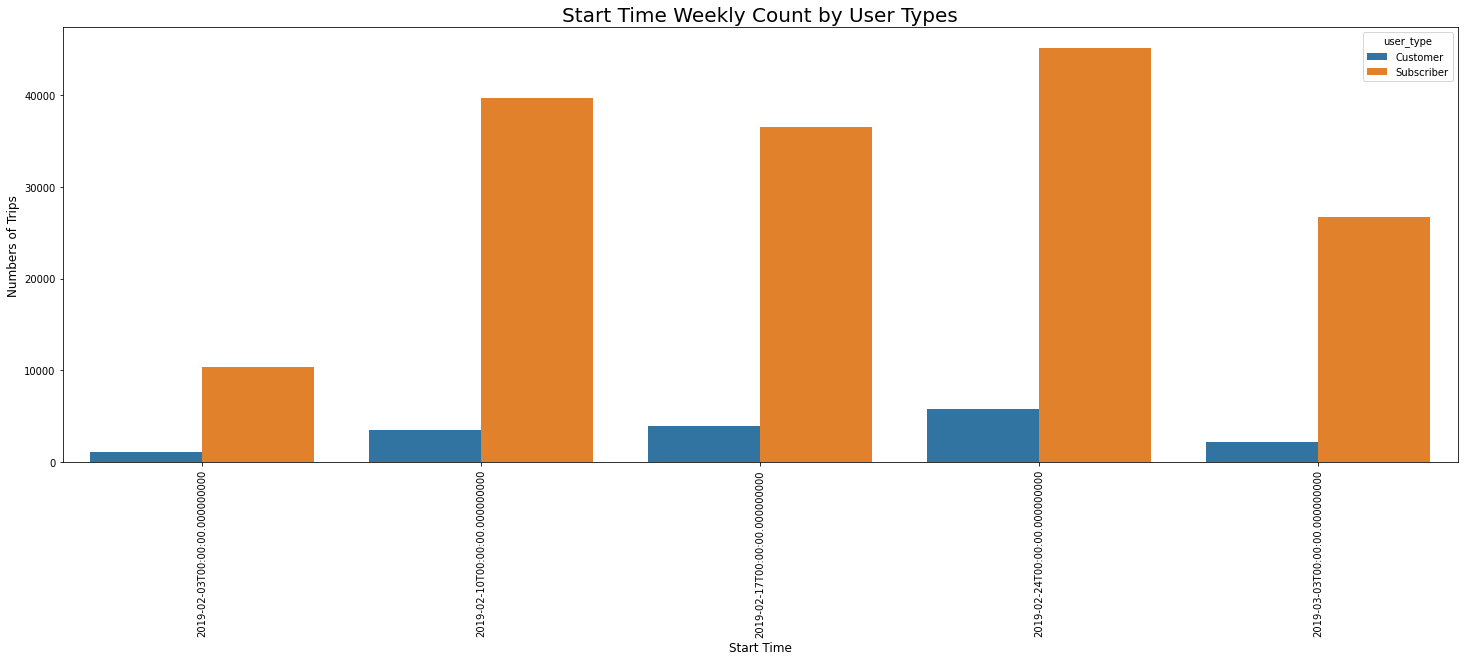

In [67]:
# Visualizations of Start Time by User Types
 
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (25 , 8))
  
# Plot the barplot
sb.barplot(x = 'start_time', y = 'count', hue='user_type', data=time_trips)
  
# Set label for x-axis
ax.set_xlabel( "Start Time" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Numbers of Trips" , size = 12 )
  
# Set title for plot
ax.set_title( "Start Time Weekly Count by User Types" , size = 20 )

# Set x-axis labels degrees
ax.tick_params(axis='x', rotation=90)

# Display figure
plt.show()

The distribution of user types according to start time, on a weekly basis shows that we have more subscribers than customers

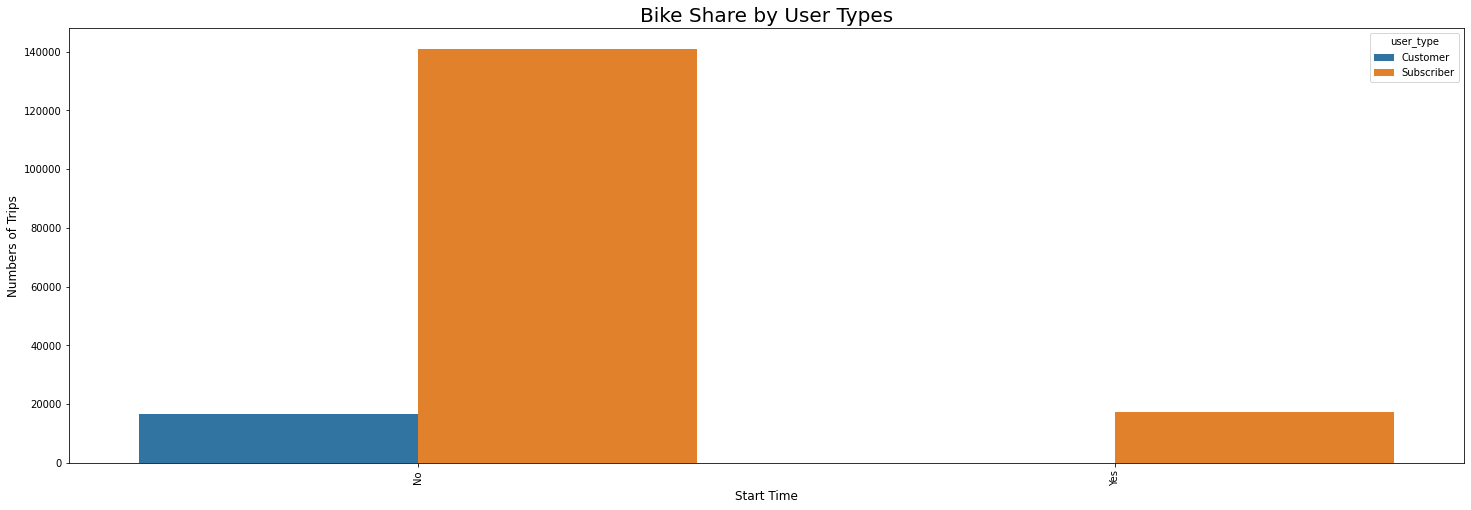

In [68]:
# Visualizations of bike shares for user types
bike_share = clean_df.groupby(['bike_share_for_all_trip', 'user_type']).size().reset_index(name='count')


# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (25 , 8))
  
# Plot the barplot
sb.barplot(x = 'bike_share_for_all_trip', y = 'count', hue='user_type', data=bike_share)
  
# Set label for x-axis
ax.set_xlabel( "Start Time" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Numbers of Trips" , size = 12 )
  
# Set title for plot
ax.set_title( "Bike Share by User Types" , size = 20 )

# Set x-axis labels degrees
ax.tick_params(axis='x', rotation=90)

# Display figure
plt.show()

The numbers of subscribers who did not share their bike is higher than those who did share their for the trips

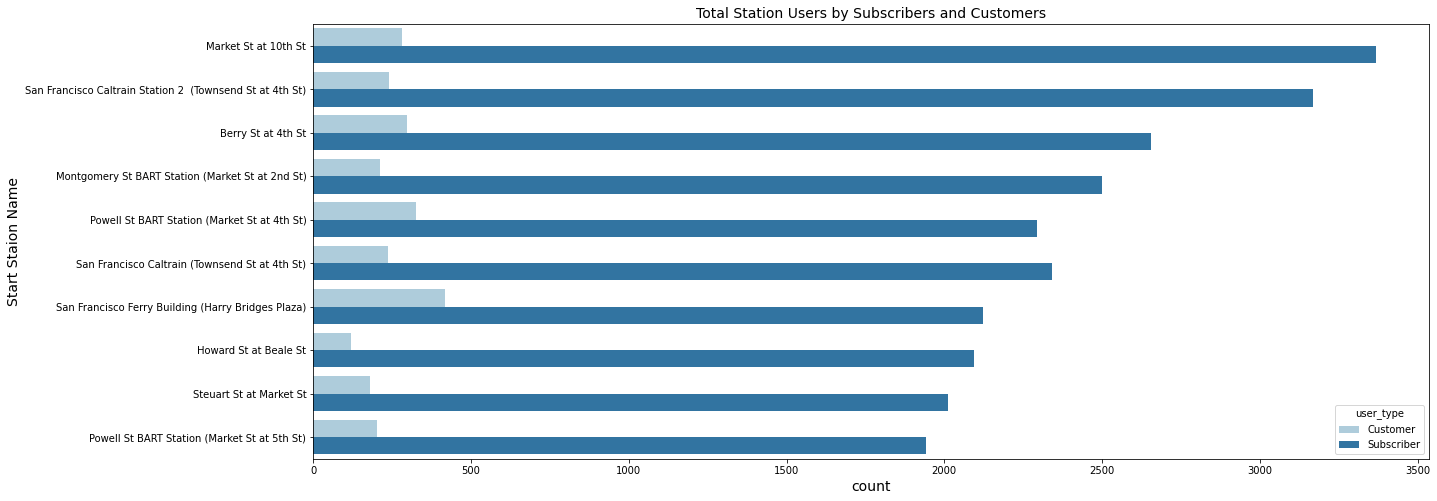

In [69]:
#The total number of users by subscribers and customers at the top stations
order = clean_df.start_station_name.value_counts().iloc[:10].index
plt.figure(figsize = (20,8))
sb.countplot(data = clean_df, y='start_station_name', order = order, hue = 'user_type', palette="Paired");
plt.xlabel('count', fontsize=14);
plt.ylabel('Start Staion Name', fontsize=14);
plt.title('Total Station Users by Subscribers and Customers', fontsize=14);

The highest numbers of users starting a trip at different locations seems to show that customers trumps subsrcibers for the top 10 highest stations

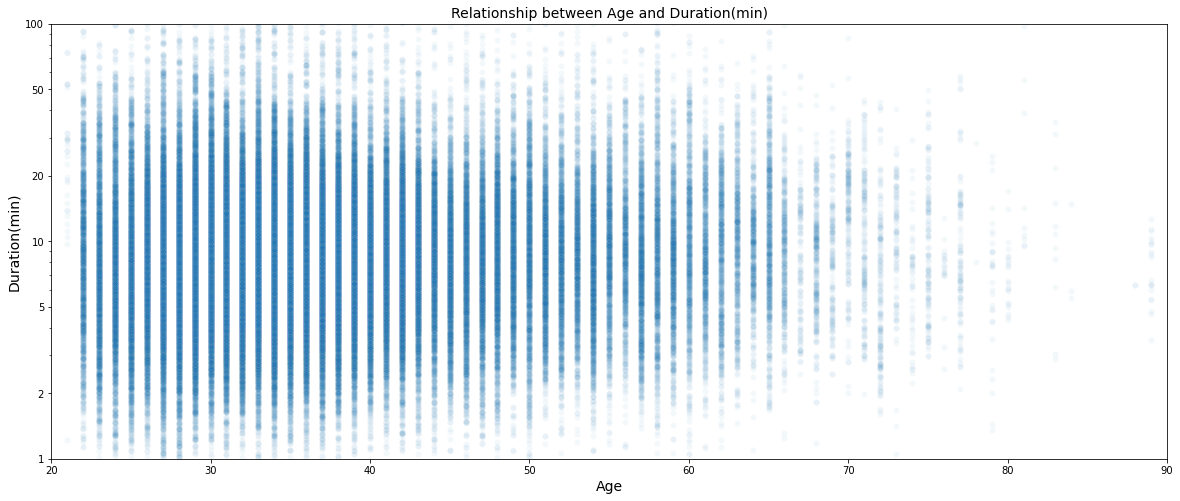

In [70]:
#relation between the age and the duration per minute
clean_df['duration_min'] = clean_df['duration_sec']/60
plt.figure(figsize=(20,8));
g = sb.scatterplot(data = clean_df, x="age", y="duration_min", alpha=0.05);
g.set(xlim=(20,90), yscale="log" , ylim=(1,100))
plt.yticks([1,2,5,10,20,50,100],[1,2,5,10,20,50,100]);
plt.xlabel('Age', fontsize=14);
plt.ylabel('Duration(min)', fontsize=14);
plt.title("Relationship between Age and Duration(min)", fontsize=14);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is observed that per weekly count the numbers of subscribers starting a trip is greater than the numbers of customers
> The duration accumulated by the different user types seems to confirm the above as well

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The highest numbers of users starting a trip at different locations seems to show that customers trumps subsrcibers for the top 10 highest stations
* The relation between duration of trips and user type is such that we have customers accumulating more minutes than subscribers
* We find that the duration of trips tend to decrease as age increases. This bears to physical reality that younger people tend to engage in longer rides than the elderly.
* The numbers of subscribers who did not share their bike is higher than those who did share their for the trips

## Multivariate Exploration

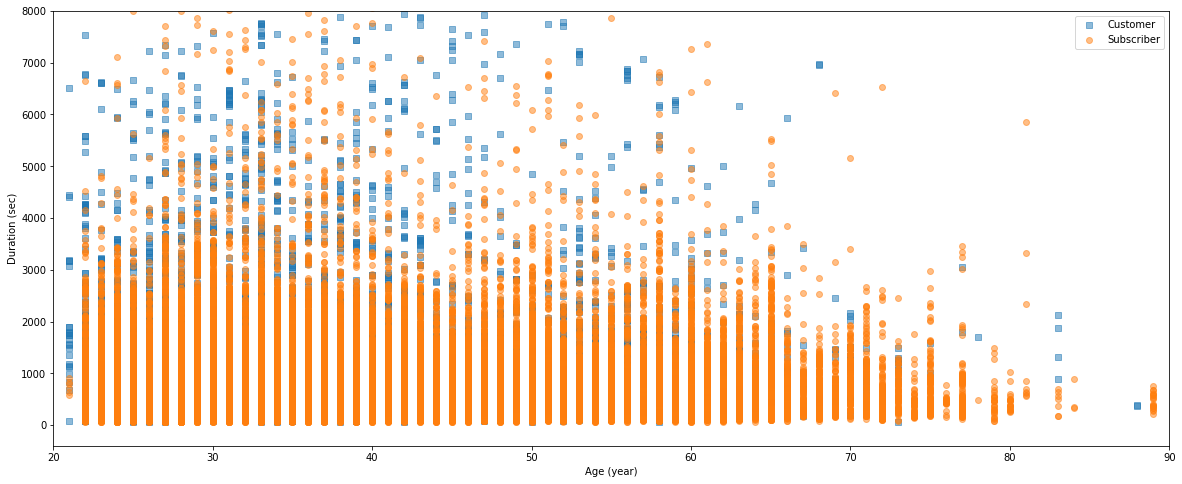

In [71]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]
plt.figure(figsize = (20,8))
for utype, marker in user_type_markers:
    df_utype = clean_df[clean_df['user_type'] == utype]
    plt.scatter((2022 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha=0.5)
plt.legend(['Customer','Subscriber'])
plt.axis([20, 90, -400, 8000 ])
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.show()

We find the scatter plot representing the argument that younger people engage in longer rides, albeit in terms of user categories we see most of the trips being the subscriber base. Hence, we deduce that younger customers engaged in longer more active rides than subscribers

<Figure size 1440x576 with 0 Axes>

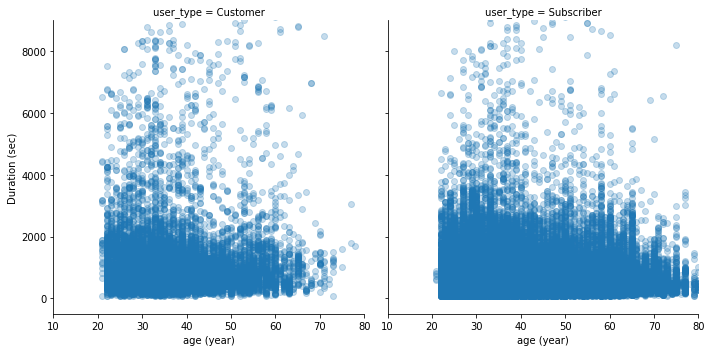

In [72]:
#seperating each user type to clear see the difference
plt.figure(figsize = (20,8))

user_types = sb.FacetGrid(data = clean_df, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [-500, 9000], );
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25);
user_types.set_xlabels('age (year)')
user_types.set_ylabels('Duration (sec)')

plt.show();

Here, we find it much more defined as customer groups have the most average longer trips while the subscribers have the most averagge trips

In [73]:
# Generate a correlation matrix of the variables in the final_df
corr = clean_df.corr()
corr

,duration_sec,bike_id,member_birth_year,age,duration_min
duration_sec,1.000000,0.011037,-0.006041,0.006041,1.000000
bike_id,0.011037,1.000000,0.036226,-0.036226,0.011037
member_birth_year,-0.006041,0.036226,1.000000,-1.000000,-0.006041
age,0.006041,-0.036226,-1.000000,1.000000,0.006041
duration_min,1.000000,0.011037,-0.006041,0.006041,1.000000


<Figure size 1440x576 with 0 Axes>

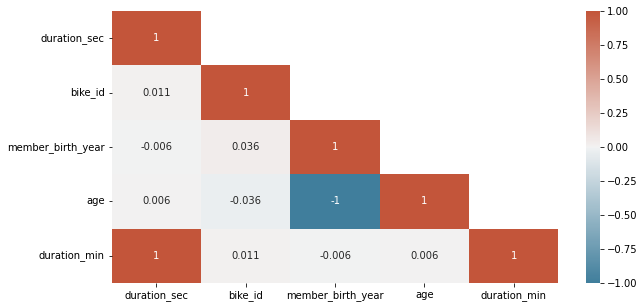

In [74]:
# Correlation between different variables
plt.figure(figsize = (20,8))
f, ax = plt.subplots(figsize=(10, 5))
# Create a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool, ), k=1)
# Configure a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)
# Plot the heatmap
sb.heatmap(corr, annot=True, mask = mask, cmap=cmap);

The strongest correlation exists between age and bike id

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Both age and trip duration trends are similar for different user groups. However, there is a modest age bias for subscribers with longer trip durations. I investigated the relationship between Age and Duration(min) by user type, and then separated each user type in a chart to better understand the differences between them.

### Were there any interesting or surprising interactions between features?

> A 36% correlation between bike id and age is a little strange. Perhaps, the IDs were assigned according to age